<a href="https://colab.research.google.com/github/UN-GCPDS/Procesamiento-Digital-De-Imagenes/blob/main/2-ConceptosBasicosDeImagenes/3_FiltrosMorfologicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Filtros Morfológicos </center>

Los filtros morfológicos consisten en la identificación y extracción de información relevante de la imagen, basados en propiedades de forma y tamaño. Estos filtros pueden aplicarse a diferentes tipos de imágenes pero están enfocadas primeramente a imágenes binarias. 

## Imagen Binaria 

Una imagen binaria es aquella que solo se compone de dos únicos valores, ceros y unos. Donde los ceros los entendemos como fondo (background) y los unos como el o los objetos de interés (foreground). Los objetos están definidos por el grupo de pixeles que están **conectados**.

Las imágenes binarias no tienen información de textura, por ende las únicas propiedades que tienen son el tamaño, la forma y la ubicación. 


<center>
<figure>
<img src='https://code.org/curriculum/course4/17/images.png' width="600"> 
<figcaption><a href="https://code.org/curriculum/course4/17/Teacher">Imágenes Binarias</a></figcaption>
</figure>
</center>

## Conectividad


La conectividad es la forma en que definimos los píxeles que pertenecen a un objeto en particular. Hay dos conectividades relevantes; la conectividad de cuatro y la de ocho.


<center>
<figure>
<img src='https://sites.ualberta.ca/~ccwj/teaching/image/morph/Figs/PNG/connectivity.png' width="400"> 
<figcaption><a href="https://sites.ualberta.ca/~ccwj/teaching/image/morph/">Conectividades</a></figcaption>
</figure>
</center>



<center>
<figure>
<img src='http://what-when-how.com/wp-content/uploads/2012/07/tmp74702_thumb_thumb.png' width="800"> 
<figcaption><a href="http://what-when-how.com/introduction-to-video-and-image-processing/blob-analysis-introduction-to-video-and-image-processing-part-1/">Ejemplo Definición de Objectos por cada Conenctividad</a></figcaption>
</figure>
</center>

BLOB (Binary Large OBject)


## Operaciones Morfólogicas 



En el contexto de imágenes binarias, podemos reducir las operaciones morfológicas como la tareas de determinar que píxeles se convierten en ceros o unos. Las principales operaciones morfológicas son: dilatación, erosion, abertura y cierre.

<center>
<figure>
<img src='https://www.researchgate.net/profile/Michael-Vetter-6/publication/233818899/figure/fig2/AS:669551930925072@1536645028667/Mathematical-morphology-where-opening-is-the-combination-of-dilation-followed-by-erosion.png' width="800"> 
<figcaption><a href="https://www.researchgate.net/figure/Mathematical-morphology-where-opening-is-the-combination-of-dilation-followed-by-erosion_fig2_233818899">Operaciones Morfológicas</a></figcaption>
</figure>
</center>

 

Una parte importante de las operaciones morfologícas son los elementos estructurantes. Estos son pequeñas formas o plantillas usadas para definir los píxeles que serán tomados en cuenta para definir el valor de un píxel de interés. Generalmente se diseñan con conocimiento previo acerca de la geometría relevante presente en la imagen. Estos elementos estructurantes están compuestos igualmente con ceros y unos en forma de array rectangular. Cada elemento estructurante tiene un píxel central que define el píxel de interés. 


<center>
<figure>
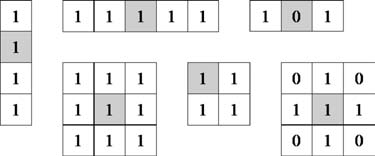 
<figcaption><a href=""> Elementos Estructurantes</a></figcaption>
</figure>
</center>


 

### Operaciones de Conjuntos 

<center>
<figure>
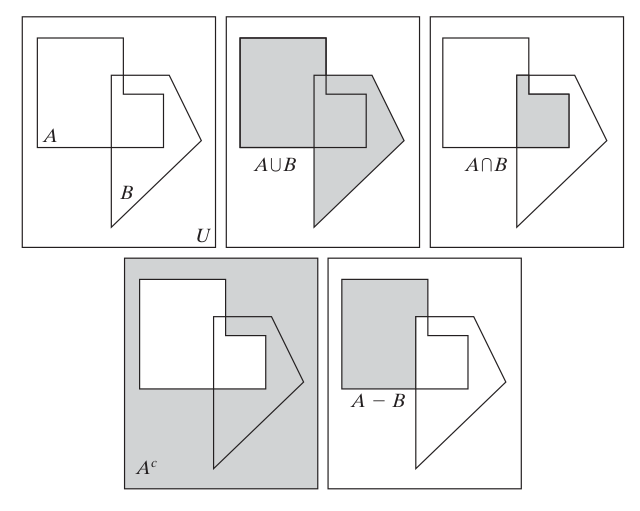 
<figcaption><a href=""> Operaciones de Conjuntos</a></figcaption>
</figure>
</center>

<center>
<figure>
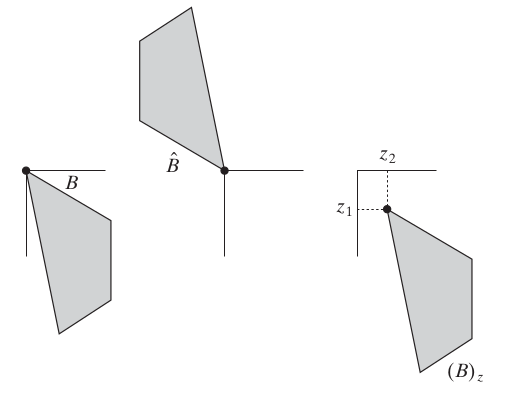 
<figcaption><a href=""> Reflexion y Translación</a></figcaption>
</figure>
</center>


### Erosión 


$$
    A \ominus B = \{z|(B)_z  \subseteq A\}
$$

Los píxeles que tienen por valor uno (foreground) permenecen en uno solo si los unos del elemento estructurante estan todos contenidos en el foreground.

<center>
<figure>
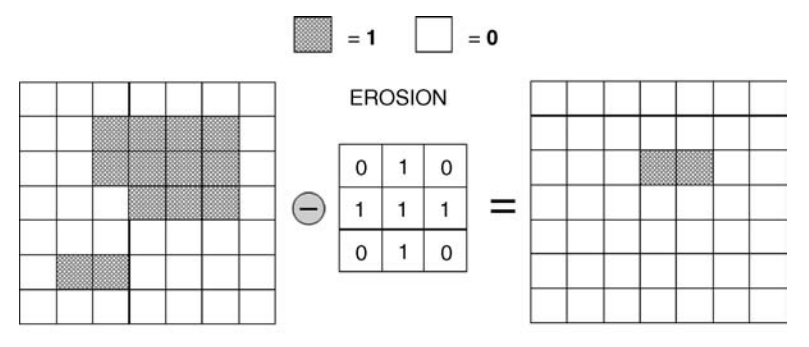 
<figcaption><a href="">Erosión</a></figcaption>
</figure>
</center>

### Dilatación 

$$
    A \oplus B = \{ z | [(\hat{B})_z \cap A]  \subseteq A \}
$$

Un píxel de fondo (background) permanece como fondo solo si todos los unos del elemento estructurante estan contenidos en el background.


<center>
<figure>
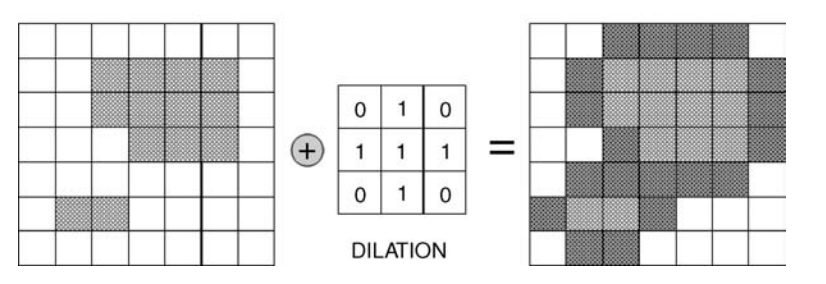 
<figcaption><a href="">Dilatación</a></figcaption>
</figure>
</center>

### Apertura 

Apertura es el nombre de la operación morfológica de erosión seguida de dilatación con el mismo elemento estructurante. El resultado general es la remoción de objetos aislados.  


$$
    A \circ B = (A \ominus B) \oplus B
$$



<center>
<figure>
<img src='https://canvas.colorado.edu/courses/61439/files/18839688/preview?verifier=xlAOcwKRZa5HxqGPdj6zNZ0iBxQ26nysEnbxf66M' width="800"> 
<figcaption><a href="https://canvas.colorado.edu/courses/61439/pages/morphological-opening-and-closing">Apertura</a></figcaption>
</figure>
</center>

### Cierre


Cierre es el uso de primero la dilatación y luego la erosión. El cierre remueve pequeños agujeros en el foreground.


$$
 A \bullet B = (A \oplus B) \ominus B
$$


<center>
<figure>
<img src='https://canvas.colorado.edu/courses/61439/files/18839717/preview' width="800"> 
<figcaption><a href="https://canvas.colorado.edu/courses/61439/pages/morphological-opening-and-closing">Cierre</a></figcaption>
</figure>
</center>

### Ejemplo Visual Operaciones Morfólogicas Básicas 

<center>
<figure>
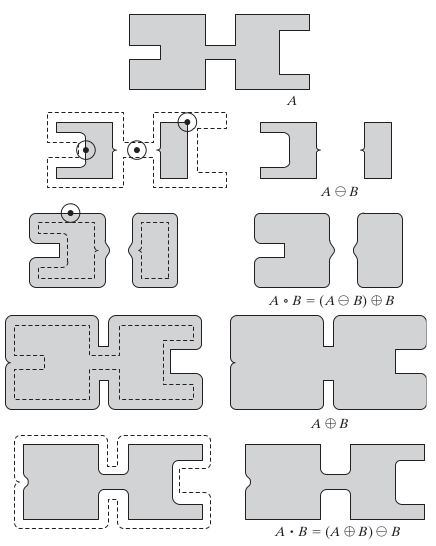 
<figcaption><a href="">Ejemplo Operaciones Morfólogicas</a></figcaption>
</figure>
</center>


## Aplicaciones 

### Remoción de Pequeñas estructuras 


Usamos apertura para eliminar pequeñas estructuras

$$
    A \circ B = (A \ominus B) \oplus B
$$


In [ ]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np 

In [ ]:
img = (cv2.imread('./circles.png')[...,0] > 0)*255
img = img.astype(np.uint8)

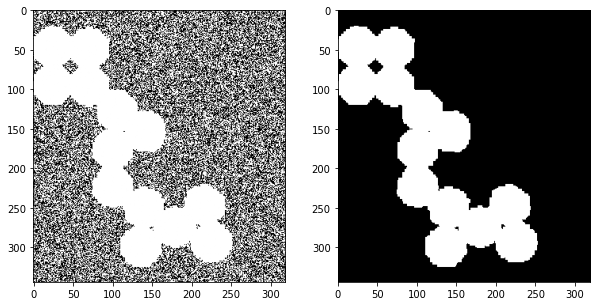

In [ ]:
img_noise = img + np.random.randint(2,size=(img.shape[0],img.shape[1]),dtype=np.uint8)*255

kernel = np.ones((5,5),np.uint8) 

img_noise_removed = cv2.dilate(cv2.erode(img_noise,kernel),kernel)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_noise,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_noise_removed,cmap='gray')

Usamos cierre para eliminar huecos 



$$
 A \bullet B = (A \oplus B) \ominus B
$$



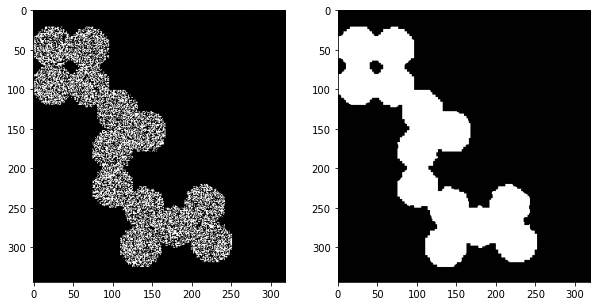

In [ ]:
img_hole = img - np.random.randint(2,size=(img.shape[0],img.shape[1]),dtype=np.uint8)*255


img_hole_removed = cv2.erode(cv2.dilate(img_hole,kernel),kernel)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_hole,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_hole_removed,cmap='gray')

### Extracción de Bordes


$$
 A_b = A - A \ominus B 
$$

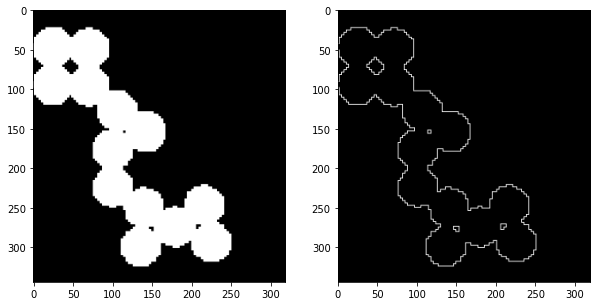

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 


img = cv2.imread('./circles.png')
img = img[...,0]


kernel = np.ones((3,3),np.uint8)

erode_image = cv2.erode(img,kernel)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img-erode_image,cmap='gray')